# Ratchets: One Way Floaters

## Introduction of Ratchets:

A floater (FRN) in which coupon payments are subject to a floor set at the preceding coupon payment and a cap equal to the preceding coupon plus some incremental margin. Coupons on ratchet floaters are typically pegged to LIBOR (3- or 6-month). For example, a ratchet floater may be structured so that it is linked to 6-month LIBOR, while its floor is readjusted on resetting dates with a 20 basis points as incremental margin. Effectively, ratchet floaters deliver a return over time that increases a little bit from period to period, with the coupon payment never dropping below the level of the preceding coupon payment. This type of floater can particularly be instrumental to issuers who expects the implied forward rates would be higher over time, while expecting actual rates to remain above the floor level.

A ratchet floater is also known as a one-way floater.

**Contract specifications**

* The underlyings are $L(T_i, T_{i+6})$ which belongs to the filtration $\mathcal{T}_i$.
* The exercise date is $t$.
* The cash flows are from $T_1$ to $T_\beta$.

Institution A pays to B (a percentage $\gamma$ of) a reference floating rate (plus a constant spread $S$) at dates $T = \{T_1, \ldots, T_\beta\}$. Formally, at time $T_i$ institution A pays to B:
$$(\gamma F_i(T_{i-1}) + S)\tau_i$$

Institution B pays to A a coupon that is given by the reference rate plus a spread $X$ at dates $T$, floored and capped respectively by the previous coupon and by the previous coupon plus an increment $Y$. Formally, at time $T_i$ with $i > 1$, institution B pays to A the coupon:
$$c_i = \begin{cases}
    (F_i(T_{i-1}) + X)\tau_i & \text{if } c_{i-1} \leq (F_i(T_{i-1}) + X)\tau_i \leq c_{i-1} + Y, \\
    c_{i-1} & \text{if } (F_i(T_{i-1}) + X)\tau_i < c_{i-1}, \\
    c_{i-1} + Y & \text{if } (F_i(T_{i-1}) + X)\tau_i > c_{i-1} + Y.
\end{cases}$$

At the first payment time $T_1$, institution B pays to A the coupon $(F_1(T_0) + X)\tau_1$.

The discounted payoff as seen from institution A is
$$
\sum_{i=1}^\beta D\left(0, T_i\right)\left[c_i-\left(\gamma F_i\left(T_{i-1}\right)+S\right) \tau_i\right]
$$
and the value to $\mathrm{A}$ of the contract is the risk-neutral expectation
$$
\begin{aligned}
& E\left\{\sum_{i=1}^\beta D\left(0, T_i\right)\left[c_i-\left(\gamma F_i\left(T_{i-1}\right)+S\right) \tau_i\right]\right\} \\
= & P\left(0, T_\beta\right) \sum_{i=1}^\beta E^\beta\left[\frac{c_i-\left(\gamma F_i\left(T_{i-1}\right)+S\right) \tau_i}{P\left(T_i, T_\beta\right)}\right] .
\end{aligned}
$$
γ = Constant percentage paid by A\
S = Constant Spread paid by A\
X = Constant Spread paid by B\
Y = Constant spread of cap/floor


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
!pip install QuantLib

## Building market data

### Importing par yield curve data

Assuming some data about par yield rates is provided along with the respective maturities

In [12]:
#import duration for Treasury
maturities = []

month_to_maturity = [1, 2, 3, 4, 6, 12, 24, 36, 60, 84, 120, 240, 360]



In [13]:
#import Treasury par yield curve rate
par_yield_curve_rates_ = [5.17, 5.26, 5.39, 5.39, 5.41, 5.24, 4.68, 4.29, 3.96, 3.85, 3.74, 4.01, 3.83]

#transfer semiannual rates to annual rates
par_yield_curve_rates = []

for i in par_yield_curve_rates_:
    r = (1+i/200)**2-1
    par_yield_curve_rates.append(r*100)


### Interpolating yield curve

* Linear Interpolation
* LogLinearInterpolation
* CubicNaturalSpline
* LogCubicNaturalSpline


In [14]:

from QuantLib.QuantLib import *

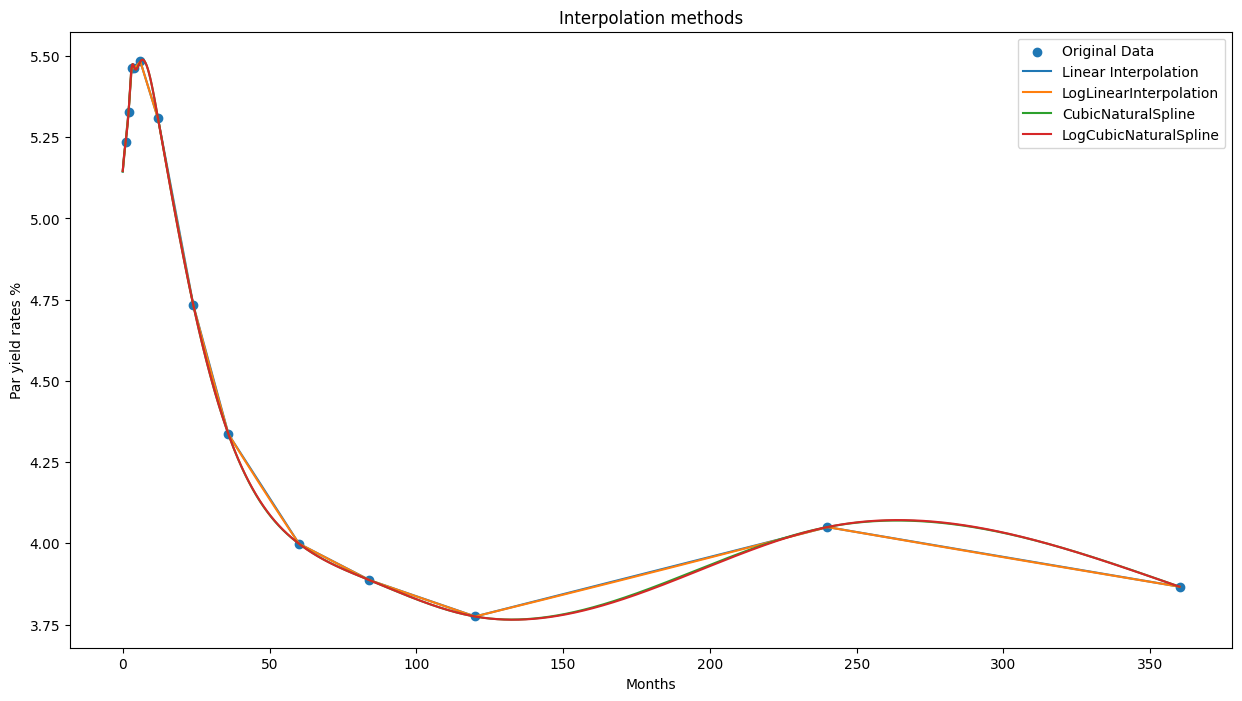

In [15]:
#apply interpolation method(Linear Interpolation,LogLinearInterpolation, CubicNaturalSpline, LogCubicNaturalSpline)
methods = {
    'Linear Interpolation': LinearInterpolation(month_to_maturity, par_yield_curve_rates),
    'LogLinearInterpolation': LogLinearInterpolation(month_to_maturity, par_yield_curve_rates),
    'CubicNaturalSpline': CubicNaturalSpline(month_to_maturity, par_yield_curve_rates),
    'LogCubicNaturalSpline': LogCubicNaturalSpline(month_to_maturity, par_yield_curve_rates),
    }

#interpolate 30 years rates to get 10800 days rates(assume 360 days a year)
xx = np.linspace(0,360,10800)

#plot original data
fig = plt.figure(figsize=(15,8))
plt.scatter(month_to_maturity, par_yield_curve_rates, label='Original Data')

yy = {}

#plot results from different interpolation methods
for name, i in methods.items():
    yy[name] = [i(x, allowExtrapolation=True) for x in xx]
    plt.plot(xx, yy[name], label=name)

plt.title('Interpolation methods')
plt.xlabel('Months')
plt.ylabel('Par yield rates %')
plt.legend()
plt.show()


In [16]:
#set up testing data

#increase one base point on first month rate to see how forward rate changes: 5.17 -> 5.18
par_yield_curve_rates_test_ = [5.18, 5.26, 5.39, 5.39, 5.41, 5.24, 4.68, 4.29, 3.96, 3.85, 3.74, 4.01, 3.83]

#transfer semiannual rates to annual rates
par_yield_curve_rates_test = []
for i in par_yield_curve_rates_test_:
    r = (1+i/200)**2-1
    par_yield_curve_rates_test.append(r*100)


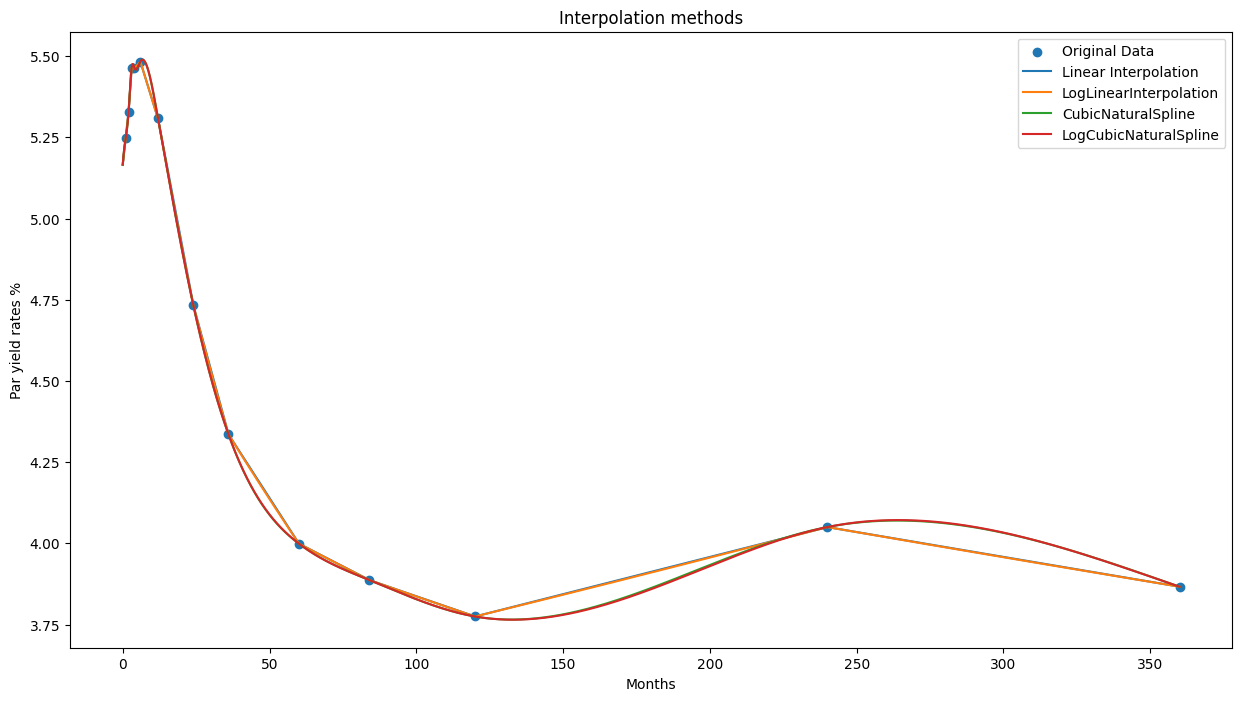

In [17]:
#apply interpolation methods on testing data
methods_test = {
    'Linear Interpolation': LinearInterpolation(month_to_maturity, par_yield_curve_rates_test),
    'LogLinearInterpolation': LogLinearInterpolation(month_to_maturity, par_yield_curve_rates_test),
    'CubicNaturalSpline': CubicNaturalSpline(month_to_maturity, par_yield_curve_rates_test),
    'LogCubicNaturalSpline': LogCubicNaturalSpline(month_to_maturity, par_yield_curve_rates_test),
    }

xx_test = np.linspace(0,360,10800)

#plot original testing data
fig = plt.figure(figsize=(15,8))
plt.scatter(month_to_maturity, par_yield_curve_rates_test, label='Original Data')

yy_test = {}

#plot results from different interpolation methods on testing data
for name, i in methods_test.items():
    yy_test[name] = [i(x, allowExtrapolation=True) for x in xx_test]
    plt.plot(xx_test, yy_test[name], label=name)

plt.title('Interpolation methods')
plt.xlabel('Months')
plt.ylabel('Par yield rates %')
plt.legend()
plt.show()


In [18]:
#get instantaneous forward rates from different interpolation methods
#f(t) = r(t) + r'(t) * t
forward_rate = {'Linear Interpolation':[], 'LogLinearInterpolation':[], 'CubicNaturalSpline':[], 'LogCubicNaturalSpline':[]}

for name, i in forward_rate.items():
    for j in range(1, len(yy[name])):
        forward_rate[name].append(yy[name][j-1] + (yy[name][j]-yy[name][j-1]) / (xx[j]-xx[j-1]) * ((j-1)/360))


In [19]:
#get instantaneous forward rates from different interpolation methods on testing data
forward_rate_test = {'Linear Interpolation':[], 'LogLinearInterpolation':[], 'CubicNaturalSpline':[], 'LogCubicNaturalSpline':[]}

for name, i in forward_rate_test.items():
    for j in range(1, len(yy_test[name])):
        forward_rate_test[name].append(yy_test[name][j-1] + (yy_test[name][j]-yy_test[name][j-1]) / (xx[j]-xx[j-1]) * ((j-1)/360))


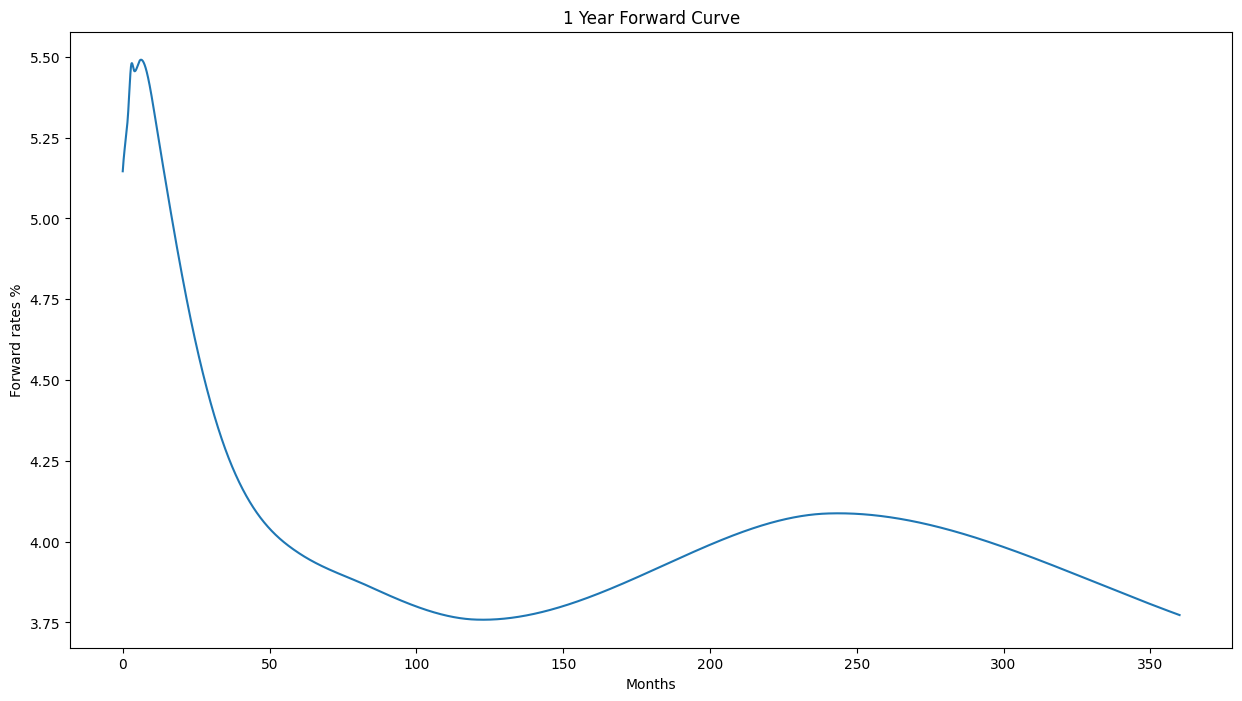

In [20]:
#plot forward curve
fig = plt.figure(figsize=(15,8))

plt.plot(xx[:-1], forward_rate['LogCubicNaturalSpline'])
plt.title('1 Year Forward Curve')
plt.xlabel('Months')
plt.ylabel('Forward rates %')
plt.show()


#### Testing the Interpolation Methods

Condotion for better interpolation methods:

* Forward rates curve above 0

* Minimum basis point change in the forward curve given some basis point change (up or down) in one of the inputs

In [21]:
#calculate the minimum value for forward rates in different interpolation methods

#condition for better interpolation methods:
#1. forward rates curve above 0

#minimum value for forward rates curve
for name, i in forward_rate.items():
    print('minimum value of forward rate for', name, 'is', min(forward_rate[name]))


minimum value of forward rate for Linear Interpolation is 3.7440239403616946
minimum value of forward rate for LogLinearInterpolation is 3.744473492574544
minimum value of forward rate for CubicNaturalSpline is 3.7589096246710687
minimum value of forward rate for LogCubicNaturalSpline is 3.7585755048442353


Forward rates in all methods are  above 0

In [22]:
#2. Minimum basis point change in the forward curve given some basis point change (up or down) in one of the inputs¶

#forward rates change for one base point change on interest rates in each interpolation methods
for name, i in forward_rate.items():
    print('max change in', name, max(forward_rate_test[name][j] - forward_rate[name][j] for j in range(len(forward_rate[name]))))


max change in Linear Interpolation 0.02051750000000574
max change in LogLinearInterpolation 0.020181709843686058
max change in CubicNaturalSpline 0.02051750000000574
max change in LogCubicNaturalSpline 0.020181709843686058


**LogCubicNaturalSpline method has the minimum change**

**Decision:  LogCubicNaturalSpline to be used for interpolation**